In [1]:
import numpy as np     #NumPy is used for scientific computing
from numpy import array 
import pandas as pd  #pandas is used for exploration,manipulation,and exporting the data from verious sources
import seaborn as sns  # used for data visualization
import matplotlib.pyplot as plt #used for data visualization

from sklearn.preprocessing import MinMaxScaler   #minmaxscaler is a class of sklearn.preprocessing module and used for feature scaling purposes
from sklearn.metrics import mean_squared_error ,mean absolute_error,r2_score  # The sklearn.metrics module provides several loss,
#score, and utility functions to measure classification performance.


import tensorflow as tf  #TensorFlow's flexible ecosystem of tools, libraries and community resources. it is also open source
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM   #(long short term memory) networks are a type of recurrent neural network (RNN) designed to handle sequential data
import math

import warnings 




In [2]:
data=pd.read_csv("AAPL.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1256 non-null   object 
 1   date         1256 non-null   object 
 2   close        1256 non-null   float64
 3   high         1256 non-null   float64
 4   low          1256 non-null   float64
 5   open         1256 non-null   float64
 6   volume       1256 non-null   int64  
 7   adjClose     1256 non-null   float64
 8   adjHigh      1256 non-null   float64
 9   adjLow       1256 non-null   float64
 10  adjOpen      1256 non-null   float64
 11  adjVolume    1256 non-null   int64  
 12  divCash      1256 non-null   float64
 13  splitFactor  1256 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.5+ KB


In [4]:
# putting the close data and use it as targets 

df1=data.reset_index()["close"]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1256 non-null   object 
 1   date         1256 non-null   object 
 2   close        1256 non-null   float64
 3   high         1256 non-null   float64
 4   low          1256 non-null   float64
 5   open         1256 non-null   float64
 6   volume       1256 non-null   int64  
 7   adjClose     1256 non-null   float64
 8   adjHigh      1256 non-null   float64
 9   adjLow       1256 non-null   float64
 10  adjOpen      1256 non-null   float64
 11  adjVolume    1256 non-null   int64  
 12  divCash      1256 non-null   float64
 13  splitFactor  1256 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.5+ KB


In [6]:
df1[1128:]

1128    152.87
1129    150.59
1130    148.50
1131    150.47
1132    152.59
         ...  
1251    189.46
1252    189.70
1253    182.91
1254    177.56
1255    178.18
Name: close, Length: 128, dtype: float64

In [7]:
df1.shape

(1256,)

<function matplotlib.pyplot.show(close=None, block=None)>

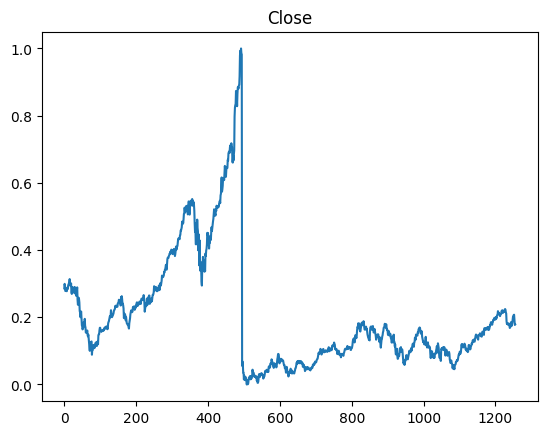

In [46]:
plt.plot(df1)
plt.title('Close')
plt.show

In [9]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
data.shape

(1256, 14)

In [11]:
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-12 00:00:00+00:00,221.07,225.000,219.84,224.940,49278740,52.927661,53.868565,52.633179,53.854200,197114960,0.0,1.0
1,AAPL,2018-09-13 00:00:00+00:00,226.41,228.350,222.57,223.520,41706377,54.206141,54.670608,53.286785,53.514230,166825508,0.0,1.0
2,AAPL,2018-09-14 00:00:00+00:00,223.84,226.840,222.52,225.750,31999289,53.590843,54.309090,53.274814,54.048127,127997156,0.0,1.0
3,AAPL,2018-09-17 00:00:00+00:00,217.88,222.950,217.27,222.150,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0
4,AAPL,2018-09-18 00:00:00+00:00,218.24,221.850,217.12,217.790,31571712,52.250114,53.114405,51.981968,52.142377,126286848,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,AAPL,2023-09-01 00:00:00+00:00,189.46,189.920,188.28,189.485,45766503,189.460000,189.920000,188.280000,189.485000,45766503,0.0,1.0
1252,AAPL,2023-09-05 00:00:00+00:00,189.70,189.980,187.61,188.280,45280027,189.700000,189.980000,187.610000,188.280000,45280027,0.0,1.0
1253,AAPL,2023-09-06 00:00:00+00:00,182.91,188.850,181.47,188.400,81755816,182.910000,188.850000,181.470000,188.400000,81755816,0.0,1.0
1254,AAPL,2023-09-07 00:00:00+00:00,177.56,178.210,173.54,175.180,112488803,177.560000,178.210000,173.540000,175.180000,112488803,0.0,1.0


In [12]:
# spliting data into train  and test  

train_size=int(len(df1)*0.65 )
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [13]:
train_data

array([[2.86111459e-01],
       [2.99486537e-01],
       [2.93049468e-01],
       [2.78121478e-01],
       [2.79023168e-01],
       [2.79348779e-01],
       [2.83506575e-01],
       [2.77570445e-01],
       [2.85410144e-01],
       [2.88916719e-01],
       [2.84483406e-01],
       [2.95829681e-01],
       [2.97808391e-01],
       [3.01615529e-01],
       [3.06675016e-01],
       [3.13663118e-01],
       [3.03443957e-01],
       [2.94176581e-01],
       [2.92874139e-01],
       [3.00638698e-01],
       [2.74314339e-01],
       [2.69530369e-01],
       [2.88716343e-01],
       [2.76819036e-01],
       [2.88816531e-01],
       [2.86412023e-01],
       [2.73462743e-01],
       [2.81703193e-01],
       [2.85059487e-01],
       [2.90269255e-01],
       [2.71133375e-01],
       [2.82930495e-01],
       [2.74164058e-01],
       [2.63994991e-01],
       [2.66649969e-01],
       [2.80576080e-01],
       [2.88991860e-01],
       [2.52072636e-01],
       [2.37319975e-01],
       [2.42780213e-01],


In [14]:
len(test_data)

440

In [15]:
# converting values of array into dataset metrix
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
        
    return np.array(datax),np.array(datay)

In [16]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [17]:
print(x_train.shape),print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [18]:
print(x_test.shape,y_test.shape)

(339, 100) (339,)


In [19]:
# reshape input to be [sample time steps ,features which is required]

x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [21]:
# selecting the LSTM model for prediction

In [22]:
model= Sequential()

In [23]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# fiting the model

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 21s 551ms/step - loss: 0.0515 - val_loss: 0.0074
Epoch 2/100
12/12 [==============================] - 3s 276ms/step - loss: 0.0138 - val_loss: 0.0015
Epoch 3/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0100 - val_loss: 7.5952e-04
Epoch 4/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0099 - val_loss: 0.0013
Epoch 5/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0090 - val_loss: 0.0019
Epoch 6/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0072 - val_loss: 4.0583e-04
Epoch 7/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0065 - val_loss: 2.8329e-04
Epoch 8/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0060 - val_loss: 2.7490e-04
Epoch 9/100
12/12 [==============================] - 3s 236ms/step - loss: 0.0056 - val_loss: 3.0854e-04
Epoch 10/100
12/12 [==============================] - 3s 257ms/step - 

12/12 [==============================] - 3s 250ms/step - loss: 0.0017 - val_loss: 3.4332e-04
Epoch 79/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0019 - val_loss: 2.2939e-04
Epoch 80/100
12/12 [==============================] - 3s 249ms/step - loss: 0.0023 - val_loss: 5.0302e-04
Epoch 81/100
12/12 [==============================] - 3s 250ms/step - loss: 0.0017 - val_loss: 2.3573e-04
Epoch 82/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0029 - val_loss: 6.9005e-04
Epoch 83/100
12/12 [==============================] - 3s 248ms/step - loss: 0.0028 - val_loss: 7.4886e-04
Epoch 84/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0032 - val_loss: 3.0361e-04
Epoch 85/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0026 - val_loss: 2.7607e-04
Epoch 86/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0021 - val_loss: 2.4580e-04
Epoch 87/100
12/12 [==============================] - 3s 23

In [27]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 1s 53ms/step


In [28]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
math.sqrt(mean_squared_error(y_train,train_predict))

219.32340138485316

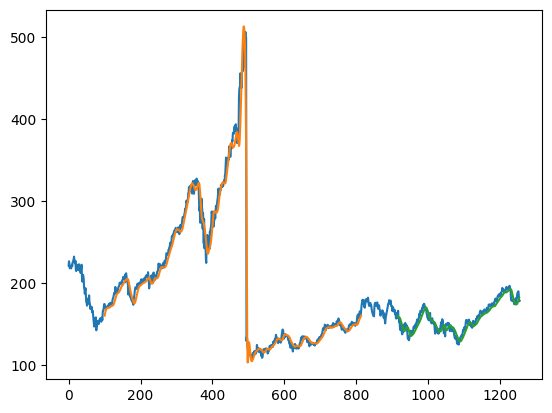

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

440

In [34]:
x_input=test_data[340 : ].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19

In [37]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)   

[0.19023782]
101
1 day input [0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 

8 day output [[0.18251242]]
9 day input [0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755 0.21956168
 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104
 0.18822793 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082
 0.18189105 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405
 0.17630557 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293
 0.20240451 0.20295554 

16 day output [[0.17401072]]
17 day input [0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446
 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024
 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292
 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318
 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105 0.17685661
 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557 0.18604884
 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451 0.20295554
 0.20693801 0.20753914 0.19053225 0.17713212 0.17868503 0.19023782
 0.18966024 0.1887790

24 day output [[0.1662061]]
25 day input [0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 0.17868503 0.19023782 0.18966024 0.18877903
 0.1877833  0.18674952 0.18570243 0.18464713 0.18358366 0.18251242
 0.18143544 0.18035607

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(df1)

1256

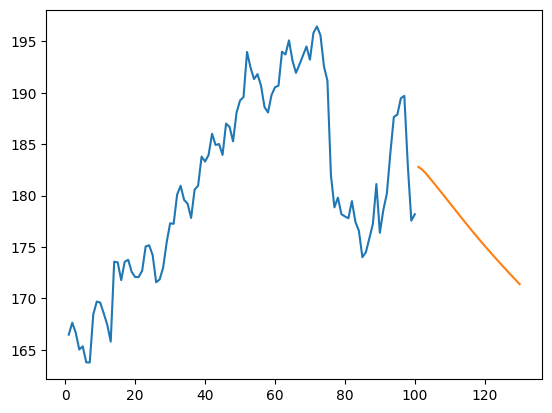

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [41]:
df3=scaler.inverse_transform(df1).tolist()

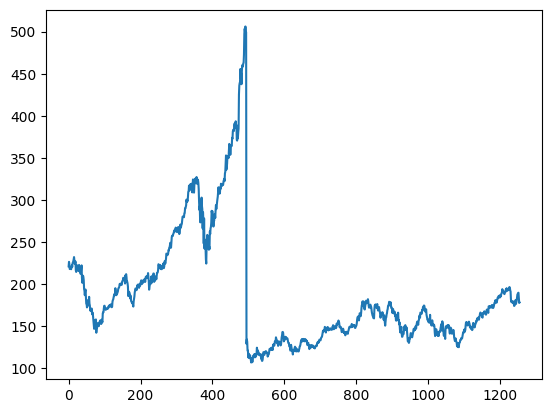

In [42]:
plt.plot(df3)